# PUE Equipo 2:
- Fernando Jiménez Pereyra	A01734609
- Daniel Flores Rodríguez 	A01734184
- Alejandro López Hernández	A01733984
- Daniel Munive Meneses     A01734205

# Objetivos

1. Implementar función de semejanza y distancia a partir de los vectores de embeddings que se vieron en clases.

2. Implementar función que permite realizar analagías dadas 3 palabras, como los ejemplos que se vieron en clases.

3. Implementar función para hacer plot de palabras en dos dimensiones utilizando PCA para reducir la dimensionalidad de los vectores.



# Dependencias

In [1]:
%pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# Cargar el embedding

In [4]:
glove_file = datapath('/home/alt9193/Downloads/glove.6B/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

/tmp/ipykernel_2201481/1758471628.py:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400001, 100)

In [ ]:
with open(glove_file) as f:
    for i, line in enumerate(f):
        print(line)
        if i >=5: break

the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062

, -0.10767 0.11053 0.59812 -0.54361 0.67396 0.10663 0.038867 0.35481 0.06351 -0.094189 0.15786 -0.81665 0.14172 0.21939 0.58505 -0.52158

In [5]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [6]:
model

In [7]:
def magnitud(vector):
    return np.sqrt(vector.dot(vector))

# Funcion de similitud
Obtiene la distancia entre dos palabras dadas

In [8]:
def cosine_similarity(vector1, vector2):
    dotProduct = vector1.dot(vector2)
    divider = magnitud(vector1) * magnitud(vector2)

    return dotProduct / divider

In [9]:
def cosine_distance(vector1, vector2):
    return 1 - cosine_similarity(vector1, vector2)

In [12]:
def print_sim_distance(word1, word2):
    return cosine_distance(model[word1], model[word2])
    

In [13]:
print_sim_distance("dog", "cat")

0.12019240856170654

In [14]:
model.distance("dog", "cat")

0.1201925277709961

# Funcion de analogia
Genera una analogia dadas tres palabras.

Toma la primera palabra como vector inicial, le resta la segunda palabra, y suma la tercera palabra

In [15]:
def analogy(AFrom, ATo, BFrom): 
    result = model[ATo] + (model[BFrom] - model[AFrom])
    
    return model.most_similar(result)[0][0]

In [16]:
def print_analogy(AFrom, ATo, BFrom):
    print(AFrom, "is to", ATo, "as", BFrom, "is to", analogy(AFrom, ATo, BFrom))

In [17]:
print_analogy("mexican", "mexico", "italian")

mexican is to mexico as italian is to italy


In [18]:
print_analogy("mexican", "mexico", "american")

mexican is to mexico as american is to america


# Mapa


In [30]:
%matplotlib inline

In [57]:
i = 0
arr = []
for x in model:
    if i < 50:
        arr.append(model.most_similar(x)[0][0])
        i += 1
    else:
        break

In [58]:
people = ["mexico", "italy", "america", "mexican", "italian", "american"]

In [75]:
def showVector(vector):
    pca = PCA(n_components=2)
    values = []
    
    for i in vector:
        values.append(model[i])
    
    values = pca.fit_transform(values)

    x = values[:, 0]
    y = values[:, 1] 
    plt.scatter(x, y)

    for i, txt in enumerate(vector):
        plt.annotate(txt, (x[i], y[i]))

    

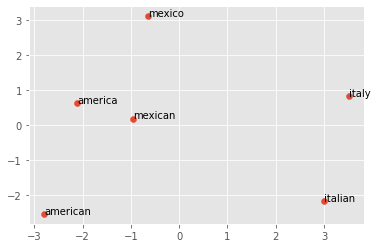

In [76]:
showVector(people)

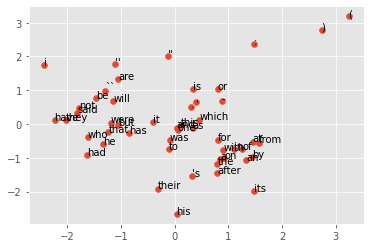

In [77]:
showVector(arr)